In [93]:
!pip install -e ..

Obtaining file:///home/jupyter/code/szaboildi/uk-pol-speech-classifier
  Preparing metadata (setup.py) ... done
  Attempting uninstall: polclassifier
    Found existing installation: polclassifier 0.0.1
    Uninstalling polclassifier-0.0.1:
      Successfully uninstalled polclassifier-0.0.1
  Running setup.py develop for polclassifier


In [94]:
%reload_ext autoreload
%autoreload 2

In [95]:
import os
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

from polclassifier.ml_logic.registry import load_model_sklearn
from polclassifier.utils import plot_confusion_matrix
from polclassifier.interface.main import preprocess, train_evaluate_model_svm
from polclassifier.ml_logic.models import evaluate_model_svm
from polclassifier.params import * 

In [44]:
# raw_data_path = os.path.join(
#             LOCAL_PATH, "raw_data", "Corp_HouseOfCommons_V2.feather")
# data = pd.read_feather(raw_data_path)

In [45]:
# data["year"] = pd.DatetimeIndex(data.date).year
# data["word_n_full"] = data.apply(lambda row: len(row["text"].strip().split()), axis=1)

In [27]:
data_2010s = data[(data["year"]>=2010) & (data["word_n_full"] >= MIN_WORD_COUNT)]
data_2010s.value_counts("party")

party
Con                 39384
Lab                 31841
LibDem               5312
SNP                  4885
DUP                  1708
PlaidCymru            537
SDLP                  389
GPEW                  267
Independent           224
APNI                   64
UUP                    48
Change UK              39
UKIP                   28
Respect                15
The Independents        6
Name: count, dtype: int64

# Model performance, Confusion Matrix

In [90]:
model = load_model_sklearn()


Load latest model from local registry...
../training_outputs/models

Load latest model from disk...
✅ Model loaded from local disk


In [91]:
model

SVC(C=4.2, kernel='linear')

In [88]:
accuracy = train_evaluate_model_svm()


⭐️ Use case: train

Loading preprocessed validation data...

 ⭐️ Use case: preprocess
✅ X and y loaded in from cache 

y shape: (8500,)
Data split in to test and train
✅ Model fit 

✅ Model trained 

Model accuracy: 0.6182352941176471
Saving model...
✅ Model saved locally



 ⭐️ Use case: preprocess
✅ X and y loaded in from cache 

prediction made


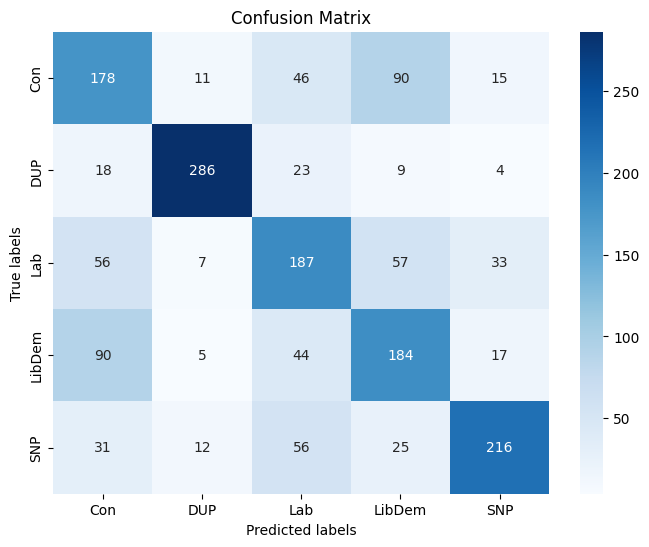

In [92]:
plot_confusion_matrix(model)